# 5CS037 Final Portfolio Project — Regression Task

**Dataset:** realtor-data.zip.csv.

**Source:** News Corp subsidiary Move, Inc. (https://www.realtor.com/)

**Published:** 2024, Ahmed Shahriar Sakib

**Available at:** www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset [Kaggle]

**UNSDG:** Goal 11 (Housing affordability, city/community planning).

**Purpose:** To identify relation between house prices and features.

**Features:** brokered by, status, price, bed, bath, acre_lot, street, city, state, zip_code, house_size, prev_sold_date.

**Features Count**: 12.

**Target Feature:** price.

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import ParameterGrid, ParameterSampler

RANDOM_STATE = 42
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


In [ ]:
#Loading dataset
df_raw = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Final Assessment/Task 2/realtor-data.zip.csv")

print("Shape: ", df_raw.shape)
print("Columns:", df_raw.columns.tolist())

display(df_raw.head())
display(df_raw.info())
display(df_raw.describe(include="all").T)


Shape:  (2226382, 12)
Columns: ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brokered_by,2221849.0,NaN,NaN,NaN,52939.893287,30642.752884,0.0,23861.0,52884.0,79183.0,110142.0
status,2226382,3,for_sale,1389306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,2224841.0,NaN,NaN,NaN,524195.519291,2138893.221116,0.0,165000.0,325000.0,550000.0,2147483600.0
bed,1745065.0,NaN,NaN,NaN,3.275841,1.567274,1.0,3.0,3.0,4.0,473.0
bath,1714611.0,NaN,NaN,NaN,2.49644,1.652573,1.0,2.0,2.0,3.0,830.0
acre_lot,1900793.0,NaN,NaN,NaN,15.223027,762.823802,0.0,0.15,0.26,0.98,100000.0
street,2215516.0,NaN,NaN,NaN,1012324.920665,583763.478326,0.0,506312.75,1012765.5,1521173.25,2001357.0
city,2224975,20098,Houston,23862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,2226374,55,Florida,249432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,2226083.0,NaN,NaN,NaN,52186.676341,28954.084538,0.0,29617.0,48382.0,78070.0,99999.0


In [ ]:
#Understanding the dataset

def column_summary(dataframe: pd.DataFrame) -> pd.DataFrame:
  out = pd.DataFrame({
      "dtype": dataframe.dtypes.astype(str),
      "missing_count": dataframe.isna().sum(),
      "missing%": (dataframe.isna().mean() * 100).round(2),
      "nunique": dataframe.nunique(dropna=True)
  }).sort_values(by="missing%", ascending=False)
  return out

colsum = column_summary(df_raw)
display(colsum)

,dtype,missing_count,missing%,nunique
prev_sold_date,object,734297,32.98,14954
house_size,float64,568484,25.53,12061
bath,float64,511771,22.99,86
bed,float64,481317,21.62,99
acre_lot,float64,325589,14.62,16057
street,float64,10866,0.49,2001358
brokered_by,float64,4533,0.20,110143
price,float64,1541,0.07,102137
city,object,1407,0.06,20098
zip_code,float64,299,0.01,30334


In [ ]:
#Data Cleaning

print("Initial number of rows: ", len(df_raw))

#Handling invalid data in target column
df_raw["price"] = pd.to_numeric(df_raw["price"], errors="coerce")
df_raw = df_raw[df_raw["price"].notna()]
df_raw = df_raw[df_raw["price"] > 0]

df_raw["prev_sold_date"] = pd.to_datetime(df_raw["prev_sold_date"], errors="coerce")
df_raw["sold_year"] = df_raw["prev_sold_date"].dt.year

#Removing rows with missing or NaN values
essential_columns = ["price", "bed", "bath", "acre_lot", "state", "zip_code", "house_size", "prev_sold_date"]
df_raw = df_raw.dropna(subset=essential_columns)
df_raw.drop_duplicates(keep="first", inplace=True)

print("Final number of rows: ", len(df_raw))

#Filtering each state with unique id
df_raw["state"] = df_raw["state"].fillna("Unknown").astype(str).str.strip()
states = sorted(df_raw["state"].unique())
state_map = {s: i for i, s in enumerate(states)}
df_raw["state_id"] = df_raw["state"].map(state_map).astype("int16")

#Filtering missing cities and mapping each with unique id
df_raw["city"] = df_raw["city"].fillna("Unknown")
top_cities = df_raw["city"].value_counts().head(20098).index.tolist()
city_map = {c: i+1 for i, c in enumerate(top_cities)}
df_raw["city_top50"] = np.where(df_raw["city"].isin(top_cities), df_raw["city"], "Other")
df_raw["city_id"] = df_raw["city_top50"].map(lambda x: city_map.get(x, 0)).astype("int16")

#Removing Cities with Unknown value
df_raw = df_raw[df_raw["city"] != "Unknown"]

#Mapping house status[for_sale:0 and sold:1]
df_raw["status"] = df_raw["status"].map({"for_sale": 0, "sold": 1})

#Dropping unneccesary features
drop_columns = ["street", "brokered_by", "city", "prev_sold_date", "state", "city_top50"]
df_raw.drop(columns=drop_columns, inplace=True)

#Sampling 50,000 random data into new dataframe
if len(df_raw) > 50000:
  df = df_raw.sample(n=50000, random_state=42).reset_index(drop=True)
else:
  df = df_raw.copy()

display(df.head(20))
print("Total row count: ",len(df))

Initial number of rows:  2226382
Final number of rows:  1089895


,status,price,bed,bath,acre_lot,zip_code,house_size,sold_year,state_id,city_id
0,0,349000.0,3.0,1.0,0.15,97266.0,936.0,2007.0,37,14
1,0,84900.0,1.0,1.0,2.00,12477.0,356.0,2021.0,32,1395
2,1,238900.0,3.0,3.0,0.05,33613.0,1358.0,2022.0,9,13
3,0,665000.0,4.0,4.0,0.15,85295.0,3102.0,2022.0,2,98
4,0,649900.0,4.0,3.0,0.65,2360.0,2802.0,2001.0,21,214
5,1,450000.0,2.0,2.0,0.09,95678.0,1065.0,2022.0,4,90
6,1,219900.0,3.0,2.0,0.51,21837.0,1562.0,2021.0,20,5833
7,0,329900.0,3.0,3.0,0.06,60561.0,1506.0,2021.0,13,1578
8,0,458000.0,3.0,2.0,0.15,85132.0,1777.0,2022.0,2,99
9,1,73000.0,2.0,2.0,0.03,33542.0,876.0,2021.0,9,331


Total row count:  50000


# Exploratory Data Analysis

,count,mean,std,min,25%,50%,75%,max
status,50000.0,0.55632,4.968229e-01,0.0,0.00,1.00,1.00,1.0
price,50000.0,574462.68512,1.110314e+06,1.0,240000.00,380000.00,600000.00,50000000.0
bed,50000.0,3.36116,1.136499e+00,1.0,3.00,3.00,4.00,64.0
bath,50000.0,2.51930,1.204864e+00,1.0,2.00,2.00,3.00,64.0
acre_lot,50000.0,13.56673,8.164758e+02,0.0,0.14,0.21,0.42,100000.0
zip_code,50000.0,56049.87552,2.989357e+04,637.0,30281.00,55902.00,85224.00,99801.0
house_size,50000.0,2065.55482,1.217234e+03,123.0,1350.00,1800.00,2440.00,60150.0
sold_year,50000.0,2017.36992,8.038610e+00,1957.0,2017.00,2021.00,2022.00,2024.0
state_id,50000.0,22.95068,1.632912e+01,0.0,9.00,21.00,38.00,52.0
city_id,50000.0,1293.02840,1.979047e+03,1.0,97.00,483.00,1608.00,15106.0


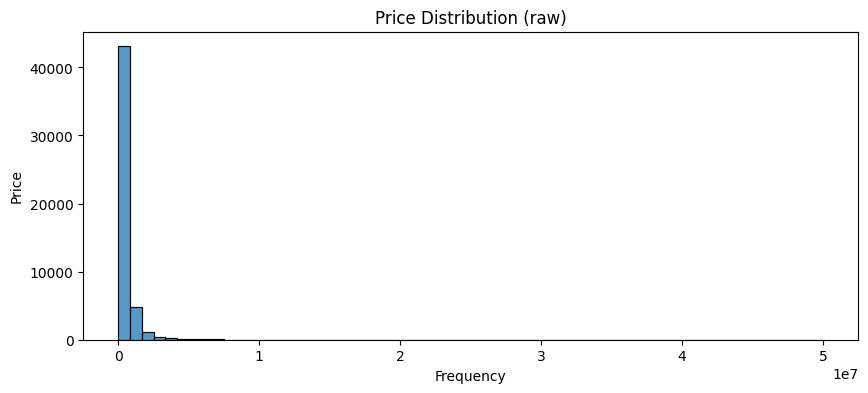

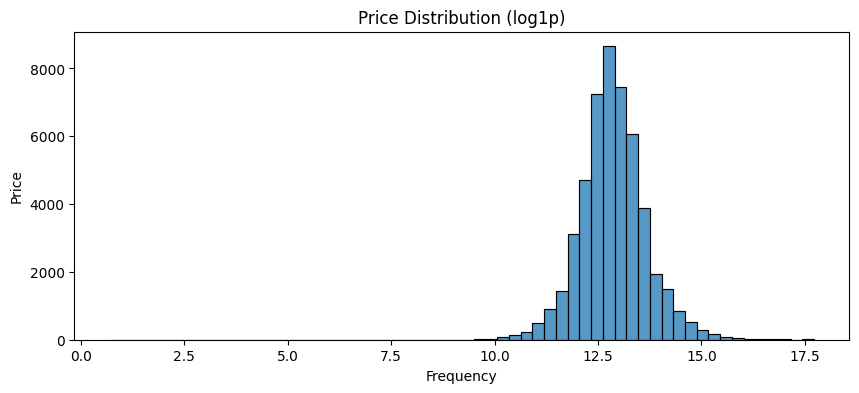

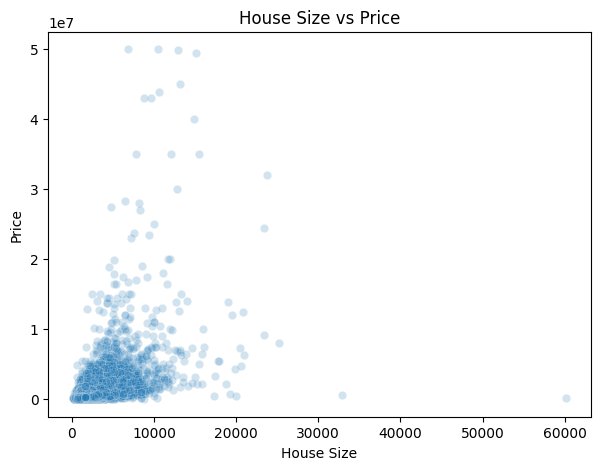

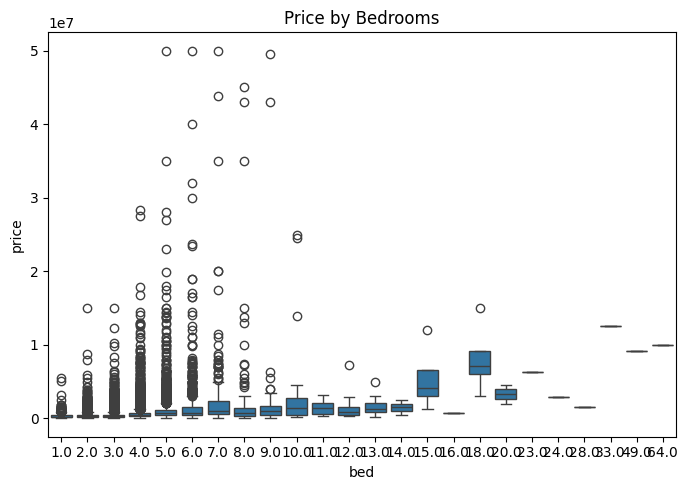

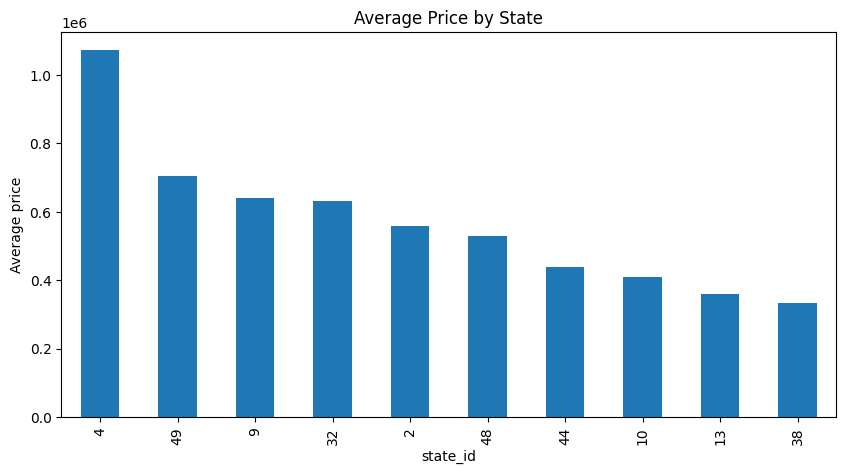

In [ ]:
display(df.describe(include="all").T)

#Raw Price Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df["price"], bins=60, kde=False)
plt.title("Price Distribution (raw)")
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.show()

#log1p Price Distribution
plt.figure(figsize=(10, 4))
sns.histplot(np.log1p(df["price"]), bins=60, kde=False)
plt.title("Price Distribution (log1p)")
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.show()

eda_sample = df.sample(n=min(50_000, len(df)), random_state=42)

#Scatterplot (House Size vs Price)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=eda_sample, x="house_size", y="price", alpha=0.2)
plt.title("House Size vs Price")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

#Boxplot (Price by Bedrooms)
plt.figure(figsize=(7, 5))
sns.boxplot(data=eda_sample, x="bed", y="price")
plt.title("Price by Bedrooms")
plt.tight_layout()
plt.show()

top_states = df["state_id"].value_counts().head(10).index
state_average = df[df["state_id"].isin(top_states)].groupby("state_id")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
state_average.plot(kind="bar")
plt.title("Average Price by State")
plt.ylabel("Average price")
plt.show()

In [ ]:
#Regression evaluation model
def evaluate_regression_log_target(y_true_log, y_pred_log):
    """
    Model trained on log1p(price).
    Returns:
      - R2 on log scale (acts as 'accuracy-like' score)
      - MAE / RMSE / R2 on original price scale for interpretability
    """
    r2_log = r2_score(y_true_log, y_pred_log)

    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2_price = r2_score(y_true, y_pred)

    return {
        "R2_log": r2_log,
        "MAE_price": mae,
        "RMSE_price": rmse,
        "R2_price": r2_price
    }


In [ ]:
target_col = "price"

X = df.drop(columns=[target_col]).copy()
# stabilizes skewed price distribution
y = np.log1p(df[target_col].values)

#Splitting Train/Test data into 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (40000, 9) Test: (10000, 9)


In [ ]:
#Neural Network (MLPRegressor)

mlp_params = dict(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=250,
    early_stopping=True,
    random_state=RANDOM_STATE
)

mlp_cv_r2 = cv_r2_score(X_train, y_train, MLPRegressor, mlp_params, preprocess_type="scaled", k="all")

mlp_model, mlp_imp, mlp_sc, mlp_sel, mlp_pred = fit_full_model(
    X_train, y_train, X_test,
    MLPRegressor, mlp_params,
    preprocess_type="scaled", k="all"
)

mlp_metrics = evaluate_regression_log_target(y_test, mlp_pred)

print("MLP REGRESSOR (NEURAL NETWORK)")
print("CV R2 (log):", round(mlp_cv_r2, 4))
print({k: round(v, 4) if "R2" in k else round(v, 2) for k, v in mlp_metrics.items()})



NEURAL NETWORK (MLP REGRESSOR)
CV R2 (log): 0.5785
{'R2_log': 0.5791, 'MAE_price': 224310.01, 'RMSE_price': np.float64(894556.56), 'R2_price': 0.3539}


In [ ]:
#Preprocessing

num_features = X_train.columns.tolist()

def mi_score(X_arr, y_arr):
    #for SelectKBest method
    return mutual_info_regression(X_arr, y_arr, random_state=RANDOM_STATE)

def fit_preprocess_scaled(X_df):
    imputer = SimpleImputer(strategy="median")
    scaler = StandardScaler()
    X_imp = imputer.fit_transform(X_df)
    X_scaled = scaler.fit_transform(X_imp)
    return imputer, scaler, X_scaled

def transform_scaled(X_df, imputer, scaler):
    X_imp = imputer.transform(X_df)
    return scaler.transform(X_imp)

def fit_preprocess_tree(X_df):
    imputer = SimpleImputer(strategy="median")
    X_imp = imputer.fit_transform(X_df)
    return imputer, X_imp

def transform_tree(X_df, imputer):
    return imputer.transform(X_df)

def cv_r2_score(X_df, y_arr, model_cls, model_params, preprocess_type="scaled", k="all"):
    scores = []
    for tr_idx, va_idx in cv.split(X_df):
        X_tr = X_df.iloc[tr_idx]
        X_va = X_df.iloc[va_idx]
        y_tr = y_arr[tr_idx]
        y_va = y_arr[va_idx]

        #Preprocess per fold
        if preprocess_type == "scaled":
            imp, sc, X_tr_p = fit_preprocess_scaled(X_tr)
            X_va_p = transform_scaled(X_va, imp, sc)
        else:
            imp, X_tr_p = fit_preprocess_tree(X_tr)
            X_va_p = transform_tree(X_va, imp)

        #Feature selection per fold
        if k != "all":
            selector = SelectKBest(score_func=mi_score, k=int(k))
            X_tr_p = selector.fit_transform(X_tr_p, y_tr)
            X_va_p = selector.transform(X_va_p)

        model = model_cls(**model_params)
        model.fit(X_tr_p, y_tr)
        pred = model.predict(X_va_p)
        scores.append(r2_score(y_va, pred))

    return float(np.mean(scores))

def fit_full_model(X_train_df, y_train_arr, X_test_df, model_cls, model_params, preprocess_type="scaled", k="all"):
    #Fitting preprocessing and optional feature selection on full train data, then fitting model and predicting test.
    if preprocess_type == "scaled":
        imp, sc, X_tr_p = fit_preprocess_scaled(X_train_df)
        X_te_p = transform_scaled(X_test_df, imp, sc)
    else:
        imp, X_tr_p = fit_preprocess_tree(X_train_df)
        X_te_p = transform_tree(X_test_df, imp)

    selector = None
    if k != "all":
        selector = SelectKBest(score_func=mi_score, k=int(k))
        X_tr_p = selector.fit_transform(X_tr_p, y_train_arr)
        X_te_p = selector.transform(X_te_p)

    model = model_cls(**model_params)
    model.fit(X_tr_p, y_train_arr)
    pred_test = model.predict(X_te_p)

    return model, imp, (sc if preprocess_type=="scaled" else None), selector, pred_test


In [ ]:
#Baseline Models

# Linear Regression (Baseline & Scaled)
lin_params = {}
lin_cv_r2 = cv_r2_score(X_train, y_train, LinearRegression, lin_params, preprocess_type="scaled", k="all")

lin_model, lin_imp, lin_sc, lin_sel, lin_pred = fit_full_model(
    X_train, y_train, X_test,
    LinearRegression, lin_params,
    preprocess_type="scaled", k="all"
)

lin_metrics = evaluate_regression_log_target(y_test, lin_pred)

print("LINEAR REGRESSION BASELINE")
print("CV R2 (log):", round(lin_cv_r2, 4))
print({k: round(v, 4) if "R2" in k else round(v, 2) for k, v in lin_metrics.items()})


# Random Forest (Baseline & Impute only)
rf_params = {"random_state": RANDOM_STATE, "n_estimators": 300, "n_jobs": -1}
rf_cv_r2 = cv_r2_score(X_train, y_train, RandomForestRegressor, rf_params, preprocess_type="tree", k="all")

rf_model, rf_imp, rf_sc, rf_sel, rf_pred = fit_full_model(
    X_train, y_train, X_test,
    RandomForestRegressor, rf_params,
    preprocess_type="tree", k="all"
)

rf_metrics = evaluate_regression_log_target(y_test, rf_pred)

print("\nRANDOM FOREST BASELINE")
print("CV R2 (log):", round(rf_cv_r2, 4))
print({k: round(v, 4) if "R2" in k else round(v, 2) for k, v in rf_metrics.items()})


LINEAR REGRESSION BASELINE
CV R2 (log): 0.4298
{'R2_log': 0.4682, 'MAE_price': 278617.42, 'RMSE_price': np.float64(1638425.03), 'R2_price': -1.1675}

RANDOM FOREST BASELINE
CV R2 (log): 0.741
{'R2_log': 0.7676, 'MAE_price': 172216.58, 'RMSE_price': np.float64(797807.94), 'R2_price': 0.4861}


In [ ]:
#Hyperparameter Optimization & Feature Selection for Logistic Regression

k_grid = [5, 7, 9, "all"]
fit_intercept_grid = [True, False]

lin_base_params = LinearRegression().get_params()
positive_grid = [True, False] if "positive" in lin_base_params else [None]

search_rows = []
best_score = -np.inf
best_params = None

for k in k_grid:
    for fi in fit_intercept_grid:
        for pos in positive_grid:
            params = {"fit_intercept": fi}
            if pos is not None:
                params["positive"] = pos

            score = cv_r2_score(
                X_train, y_train,
                LinearRegression, params,
                preprocess_type="scaled",
                k=k
            )

            search_rows.append({"k": k, "fit_intercept": fi, "positive": pos, "cv_r2_log": score})

            if score > best_score:
                best_score = score
                best_params = {"k": k, **params}

lin_search_df = pd.DataFrame(search_rows).sort_values("cv_r2_log", ascending=False)
display(lin_search_df.head(10))

print("Best LinearRegression+FS:", best_params)
print("Best CV R2 (log):", round(best_score, 4))

# Fitting best model on full train data and evaluating on test data
lin_best_model, lin_best_imp, lin_best_sc, lin_best_sel, lin_best_pred = fit_full_model(
    X_train, y_train, X_test,
    LinearRegression,
    {k:v for k,v in best_params.items() if k != "k"},
    preprocess_type="scaled",
    k=best_params["k"]
)

lin_best_metrics = evaluate_regression_log_target(y_test, lin_best_pred)


Fitting 5 folds for each of 16 candidates, totalling 80 fits

LINEAR REGRESSION GRIDSEARCH BEST PARAMS: {'fs__k': 9, 'model__fit_intercept': True, 'model__positive': False}
Best CV R2 (log): 0.4298


In [ ]:
#Hyperparameter Optimization & Feature Selection for Random Forest

param_dist = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", 0.6, 0.8],
}

k_choices = [5, 7, 9, "all"]

n_iter = 25
rng = np.random.RandomState(RANDOM_STATE)

candidates = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=rng))

rf_search_rows = []
best_rf_score = -np.inf
best_rf_params = None

for cand in candidates:
    for k in k_choices:
        params = dict(cand)
        params["random_state"] = RANDOM_STATE
        params["n_jobs"] = -1

        score = cv_r2_score(
            X_train, y_train,
            RandomForestRegressor, params,
            preprocess_type="tree",
            k=k
        )
        rf_search_rows.append({"k": k, **cand, "cv_r2_log": score})

        if score > best_rf_score:
            best_rf_score = score
            best_rf_params = {"k": k, **params}

rf_search_df = pd.DataFrame(rf_search_rows).sort_values("cv_r2_log", ascending=False)
display(rf_search_df.head(10))

print("Best RandomForest+FS:", {k:v for k,v in best_rf_params.items() if k != "random_state" and k != "n_jobs"})
print("Best CV R2 (log):", round(best_rf_score, 4))

# Fitting best model on full train data and evaluating on test data.
rf_best_model, rf_best_imp, rf_best_sc, rf_best_sel, rf_best_pred = fit_full_model(
    X_train, y_train, X_test,
    RandomForestRegressor,
    {k:v for k,v in best_rf_params.items() if k not in ["k"]},
    preprocess_type="tree",
    k=best_rf_params["k"]
)

rf_best_metrics = evaluate_regression_log_target(y_test, rf_best_pred)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



RANDOM FOREST RANDOMIZEDSEARCH BEST PARAMS: {'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 0.6, 'model__max_depth': 30, 'fs__k': 7}
Best CV R2 (log): 0.7476


In [ ]:
#Selected Feature Names

def selected_feature_names(selector, feature_names):
  """
    Purpose: Shows the best features on the selected model.
  """
    if selector is None:
        return feature_names
    mask = selector.get_support()
    return [name for name, keep in zip(feature_names, mask) if keep]

lin_selected = selected_feature_names(lin_best_sel, num_features)
rf_selected = selected_feature_names(rf_best_sel, num_features)

print("Linear selected features:", lin_selected)
print("RF selected features:", rf_selected)



Selected features (Linear Regression): ['status', 'bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'sold_year', 'state_id', 'city_id']
Selected features (Random Forest): ['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'state_id', 'city_id']


In [ ]:
#Final Comparison Table

results = pd.DataFrame([
    {
        "Model": "Linear Regression (Baseline)",
        "Features Used": f"All ({len(num_features)})",
        "CV Score (R2 log)": lin_cv_r2,
        "Test RMSE (price)": lin_metrics["RMSE_price"],
        "Test R2 (log)": lin_metrics["R2_log"],
    },
    {
        "Model": "Random Forest (Baseline)",
        "Features Used": f"All ({len(num_features)})",
        "CV Score (R2 log)": rf_cv_r2,
        "Test RMSE (price)": rf_metrics["RMSE_price"],
        "Test R2 (log)": rf_metrics["R2_log"],
    },
    {
        "Model": "MLP Regressor (Neural Net)",
        "Features Used": f"All ({len(num_features)})",
        "CV Score (R2 log)": mlp_cv_r2,
        "Test RMSE (price)": mlp_metrics["RMSE_price"],
        "Test R2 (log)": mlp_metrics["R2_log"],
    },
    {
        "Model": "Linear Regression (Tuned + FS)",
        "Features Used": f"Selected ({len(lin_selected)})",
        "CV Score (R2 log)": best_score,
        "Test RMSE (price)": lin_best_metrics["RMSE_price"],
        "Test R2 (log)": lin_best_metrics["R2_log"],
    },
    {
        "Model": "Random Forest (Tuned + FS)",
        "Features Used": f"Selected ({len(rf_selected)})",
        "CV Score (R2 log)": best_rf_score,
        "Test RMSE (price)": rf_best_metrics["RMSE_price"],
        "Test R2 (log)": rf_best_metrics["R2_log"],
    },
])

display(results)


,Model,Features Used,CV Score (R2 log),Test RMSE (price),Test R2 (log)
3,Random Forest (RandomizedSearchCV + FS),Selected (7),0.747629,7.976463e+05,0.770217
1,Random Forest (Baseline),All (9),0.740964,7.978079e+05,0.767603
4,Neural Network (MLP),All (9),0.578462,8.945566e+05,0.579067
0,Linear Regression (Baseline),All (9),0.429796,1.638425e+06,0.468161
2,Linear Regression (GridSearchCV + FS),Selected (9),0.429796,1.638425e+06,0.468161
